#Problem Statement

Customer Segmentation Analysis:
Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.
You own the mall and want to understand the customers like who can be easily converge Target Customers so
that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [16]:
import missingno as msno

<Axes: >

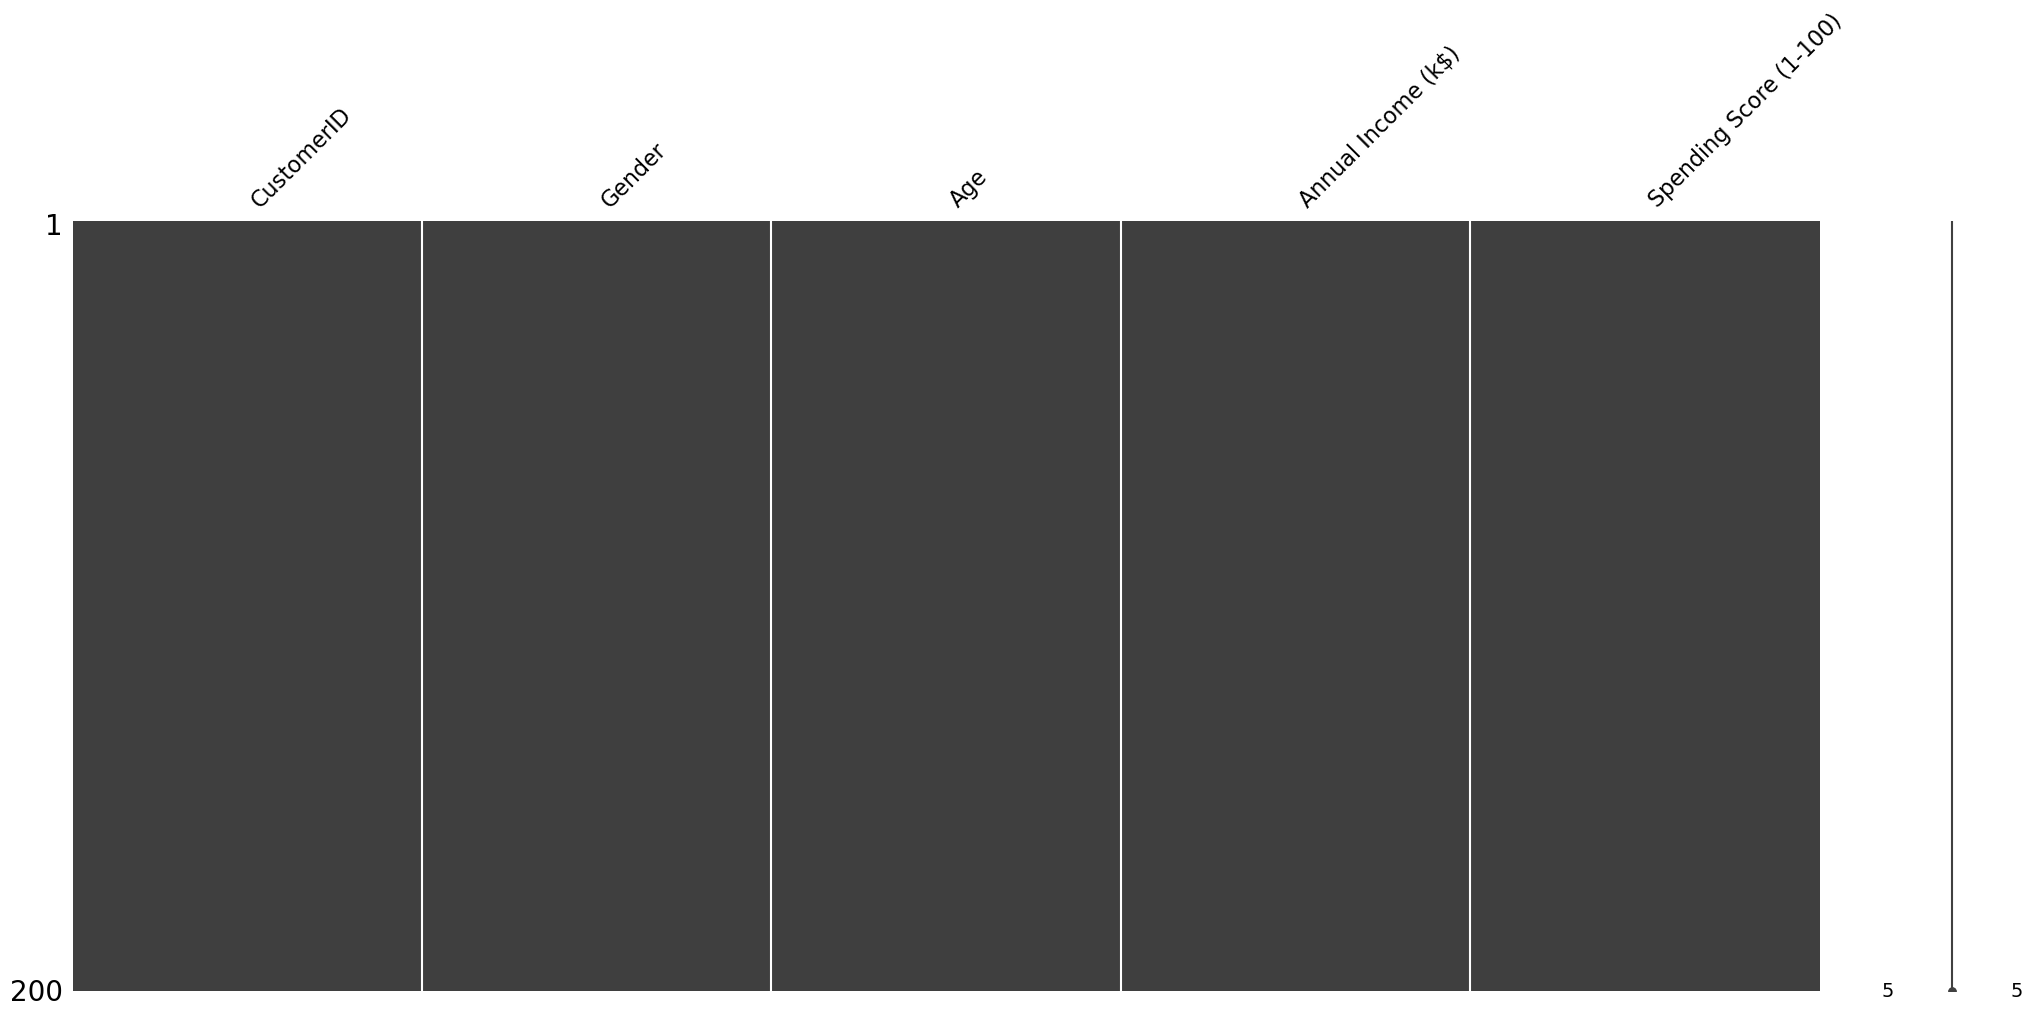

In [17]:
msno.matrix(data)

In [18]:
#Data Visuliation & EDA

In [19]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

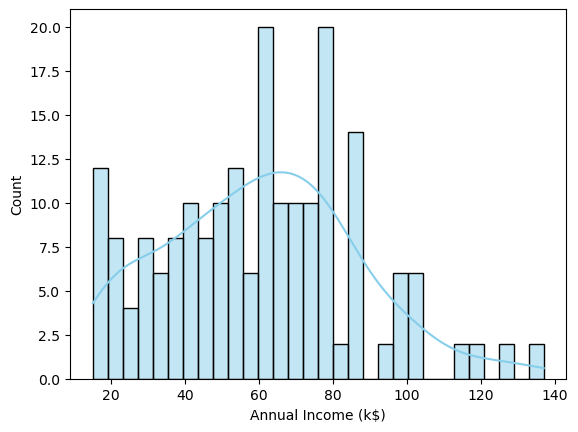

In [3]:
sns.histplot(data['Annual Income (k$)'], kde=True, bins=30, color='skyblue')
plt.show()

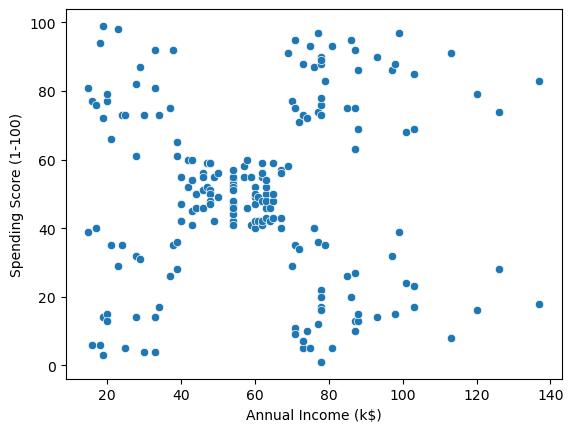

In [4]:
sns.scatterplot(data=data, x='Annual Income (k$)',y='Spending Score (1-100)' )
plt.show()

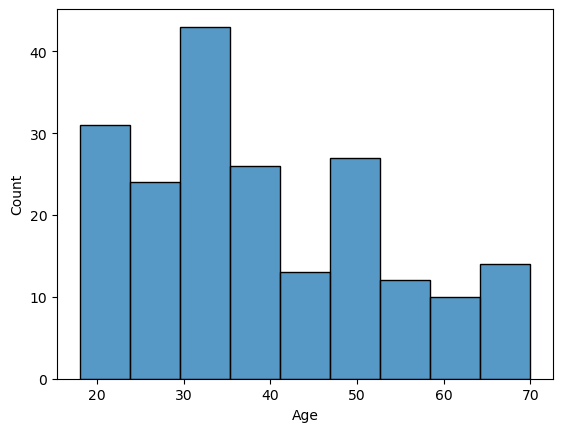

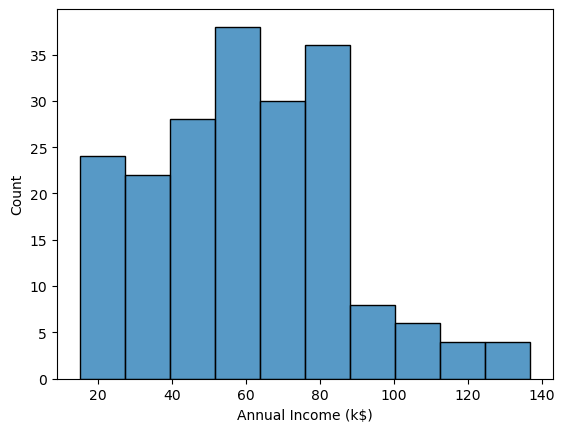

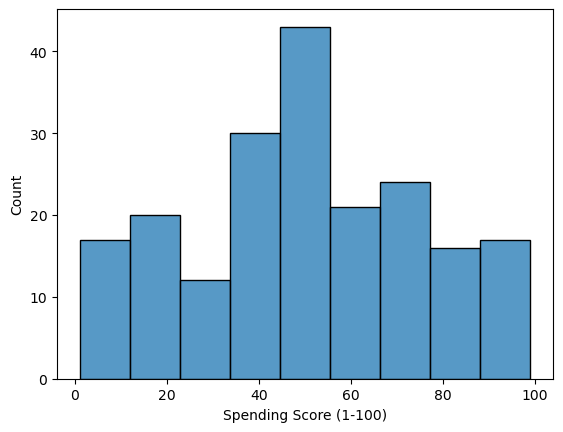

In [82]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.histplot(data[i])

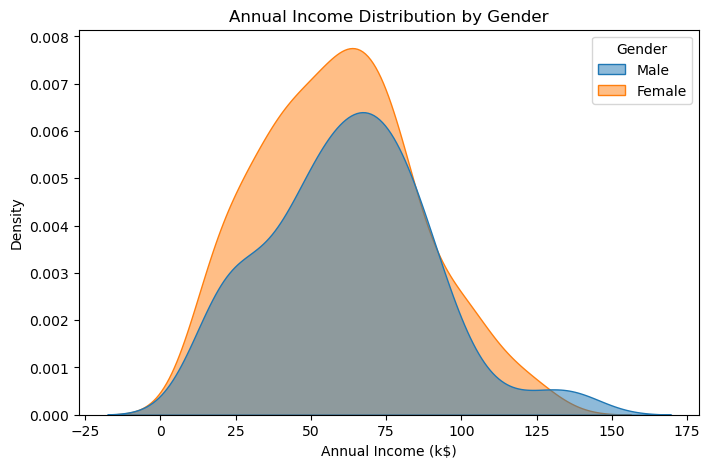

In [87]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=data, 
    x='Annual Income (k$)',
    hue='Gender',             
    fill=True,                
    alpha=0.5
)
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

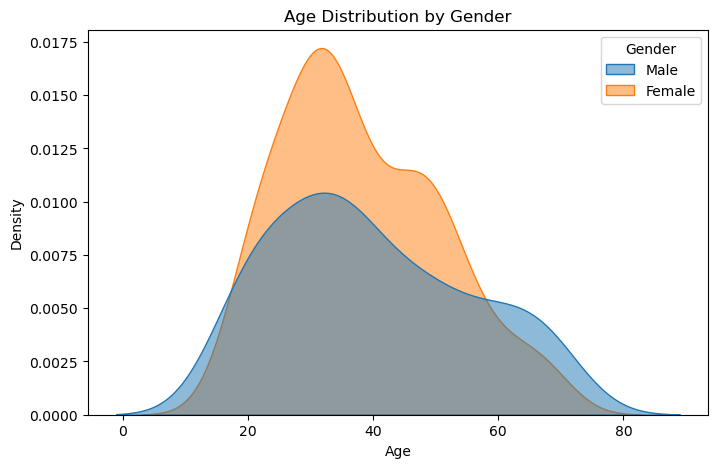

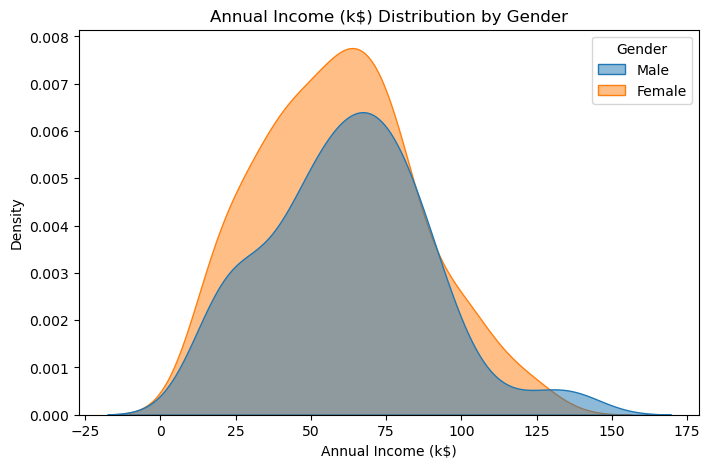

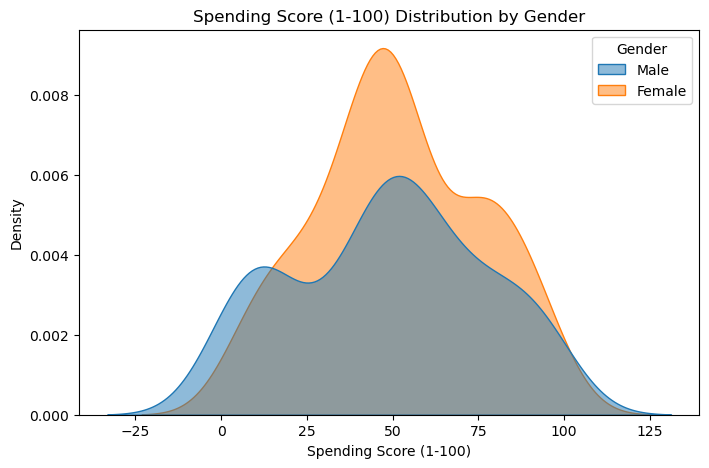

In [89]:
data.columns = data.columns.str.strip()

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in columns:
    if col in data.columns:
        plt.figure(figsize=(8,5))
        sns.kdeplot(
            data=data, 
            x=col, 
            hue='Gender',  
            fill=True,     
            alpha=0.5
        )
        plt.title(f'{col} Distribution by Gender')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

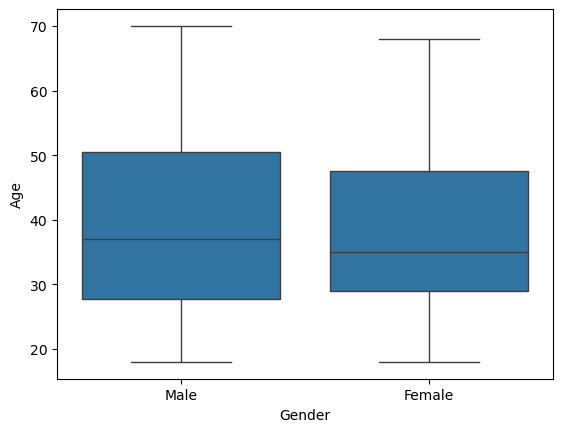

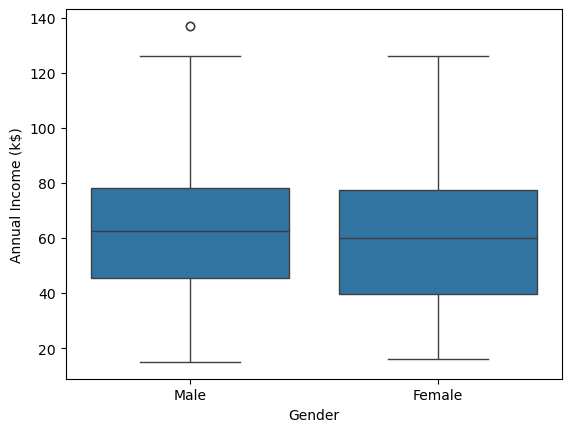

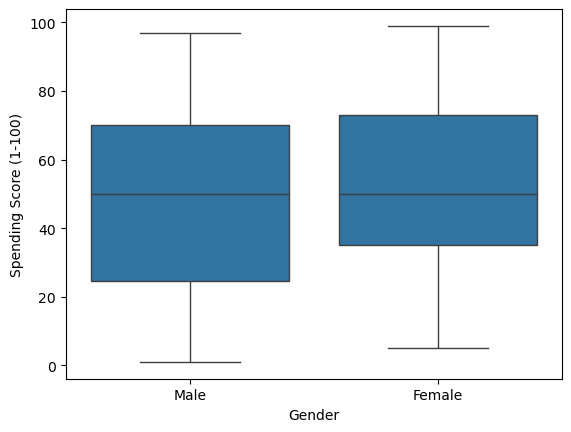

In [90]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=data,x='Gender',y=data[i])

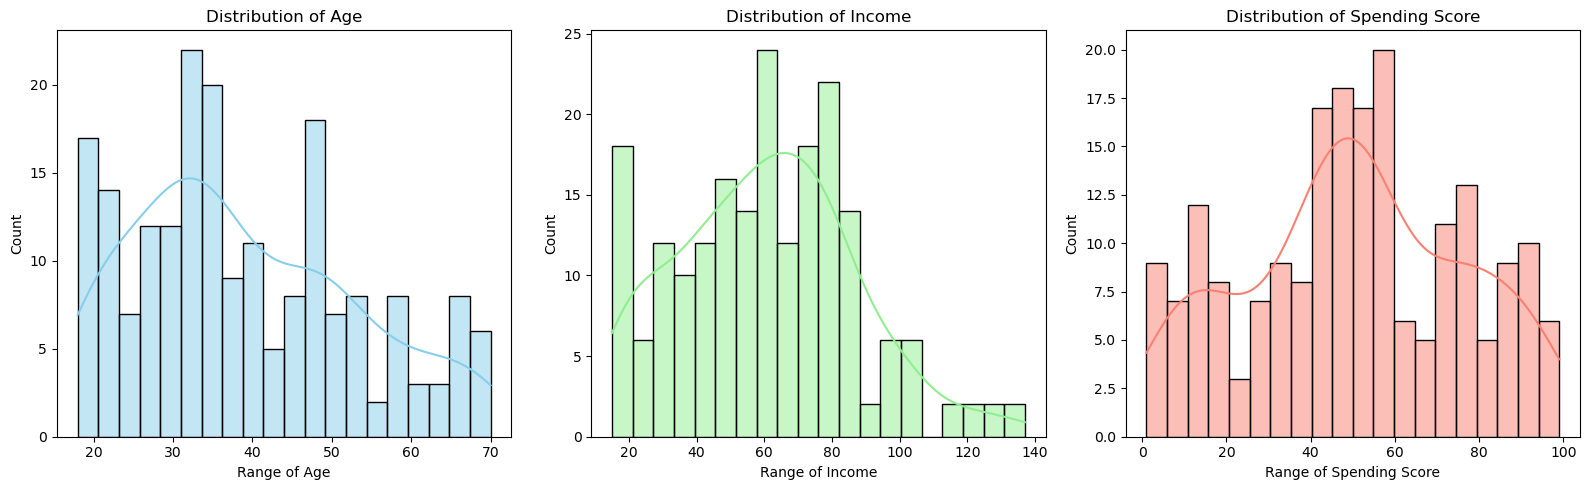

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

# Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color="lightgreen")
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color="salmon")
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

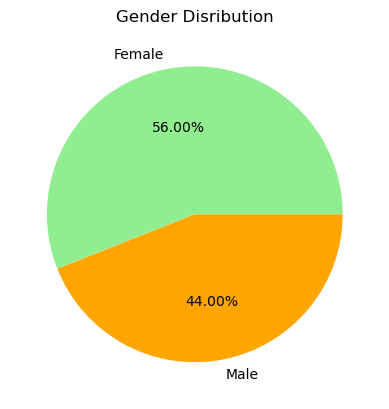

In [22]:
df = data.groupby('Gender').size()

df.plot(kind='pie', subplots = True, 
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel("")
plt.show()data.hist(figsize = (12, 7))
plt.show()

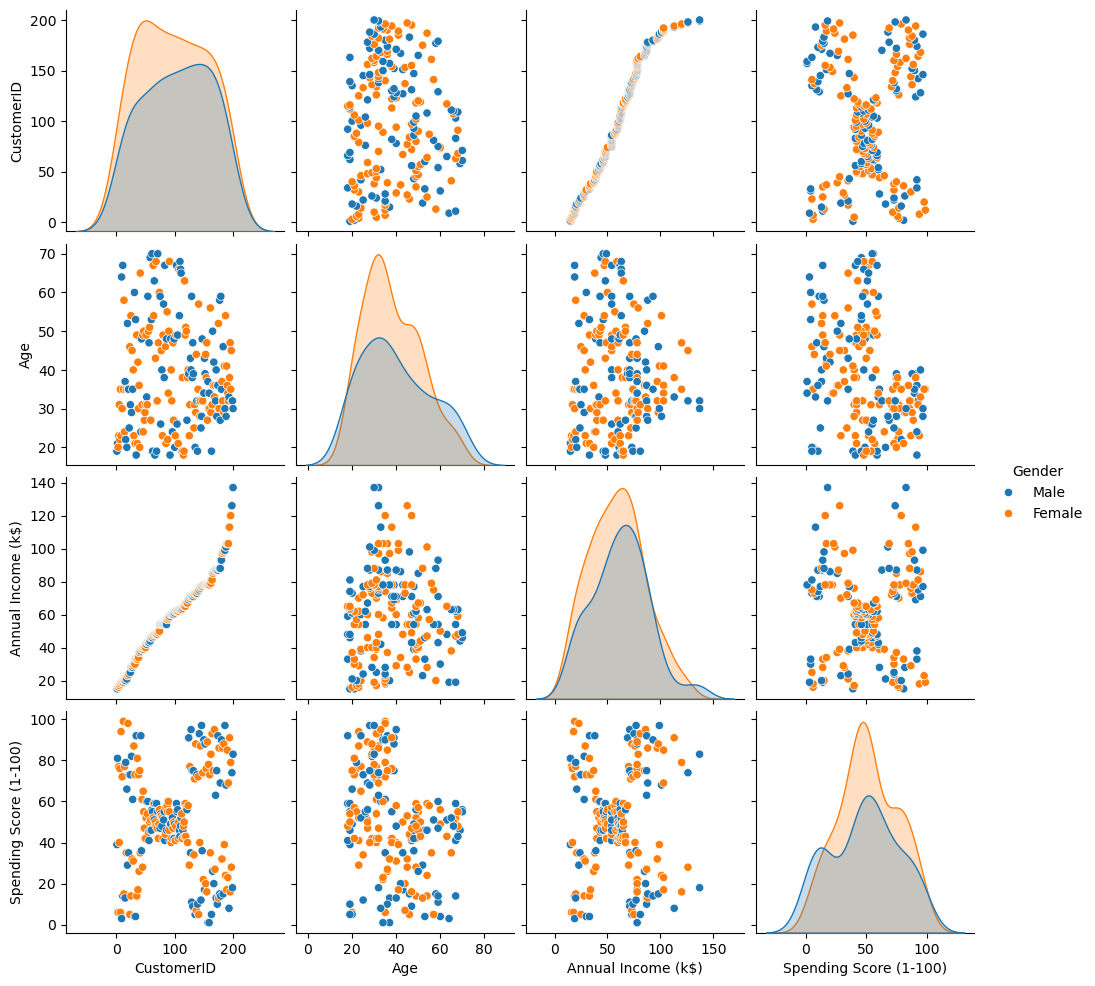

In [5]:
sns.pairplot(data,hue='Gender')
plt.show()

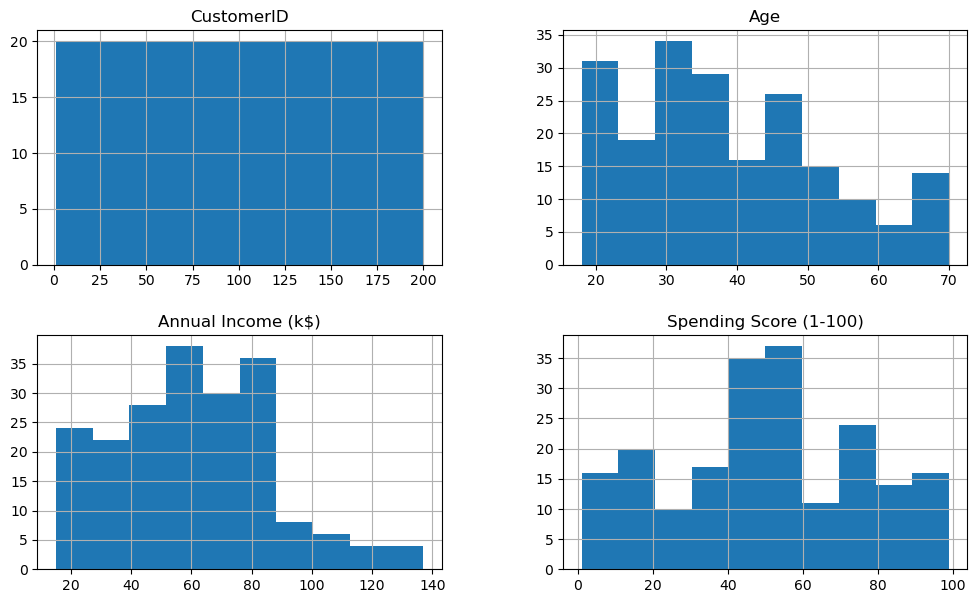

In [23]:
data.hist(figsize = (12, 7))
plt.show()

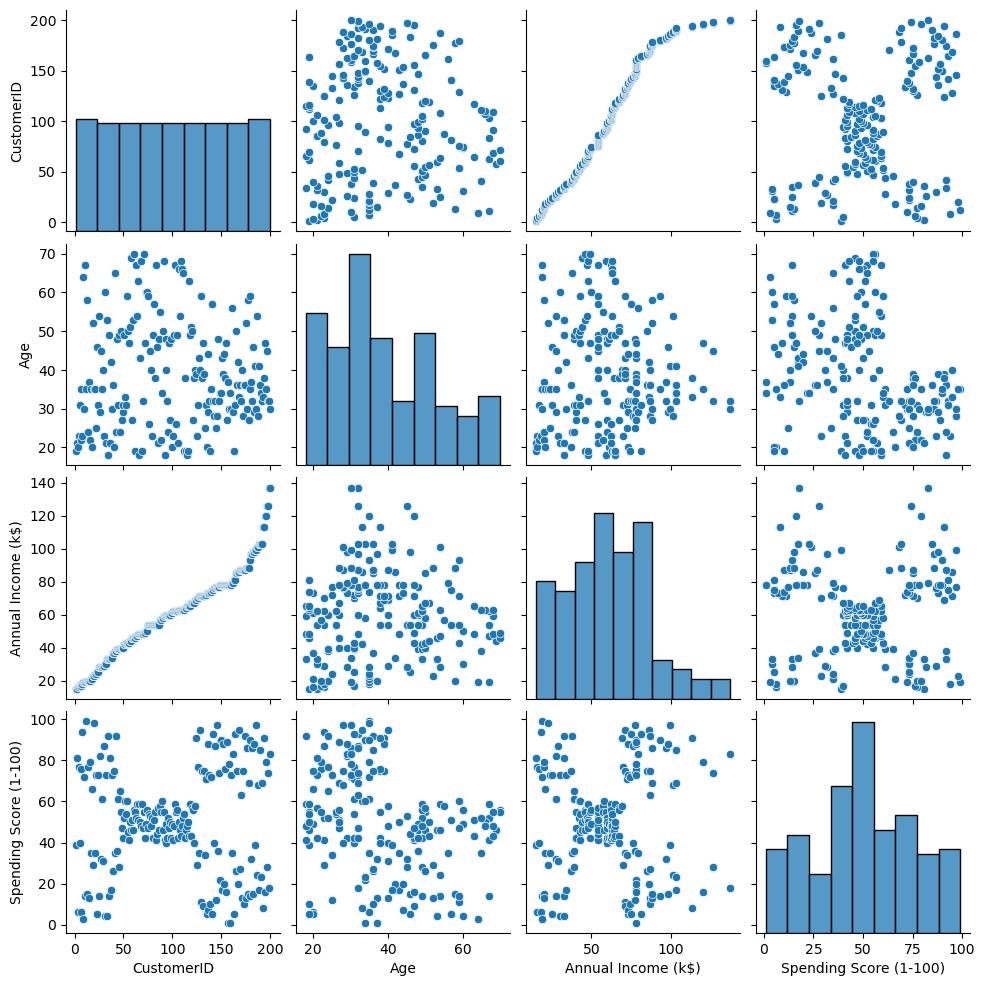

In [24]:
sns.pairplot(data)
plt.show()

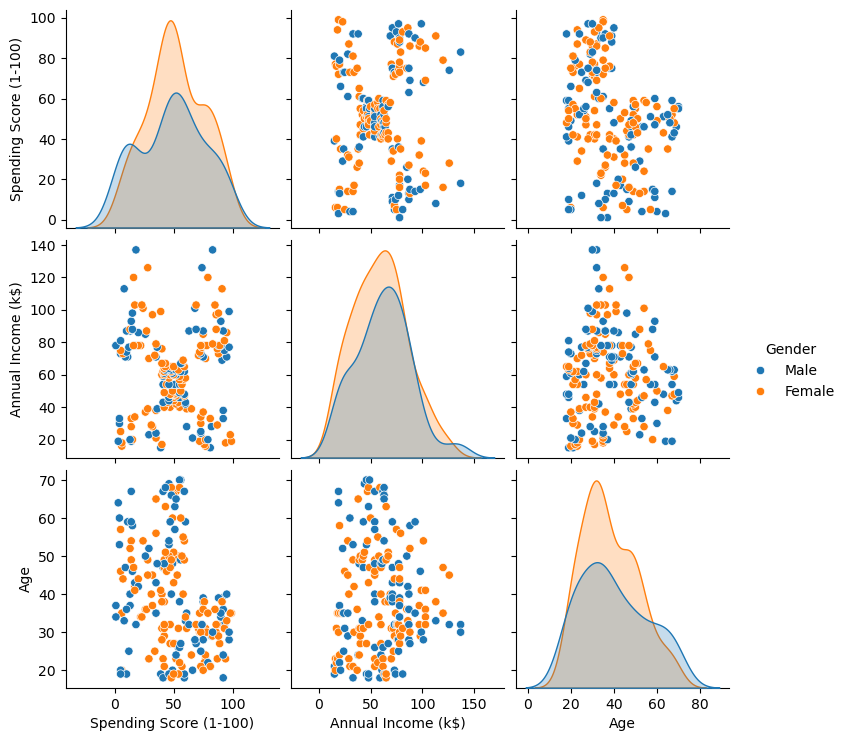

In [26]:
sns.pairplot(data, vars = ['Spending Score (1-100)',
                          'Annual Income (k$)', 'Age'], hue = 'Gender')
plt.show()

In [8]:
data.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [10]:
data.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


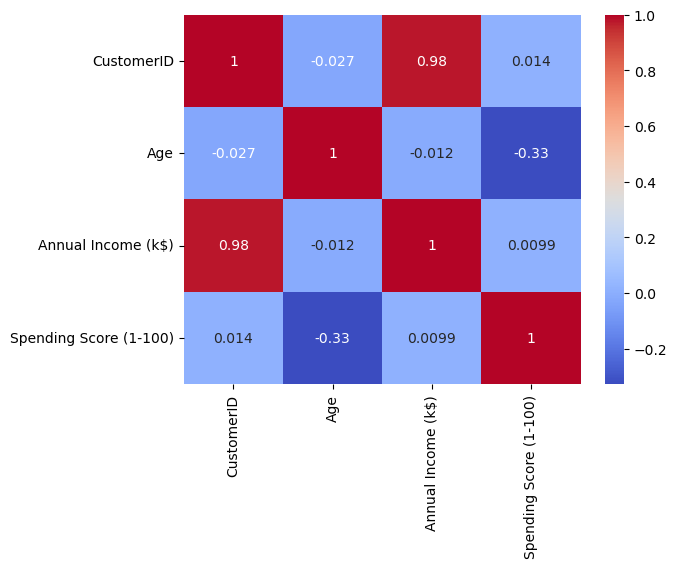

In [12]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

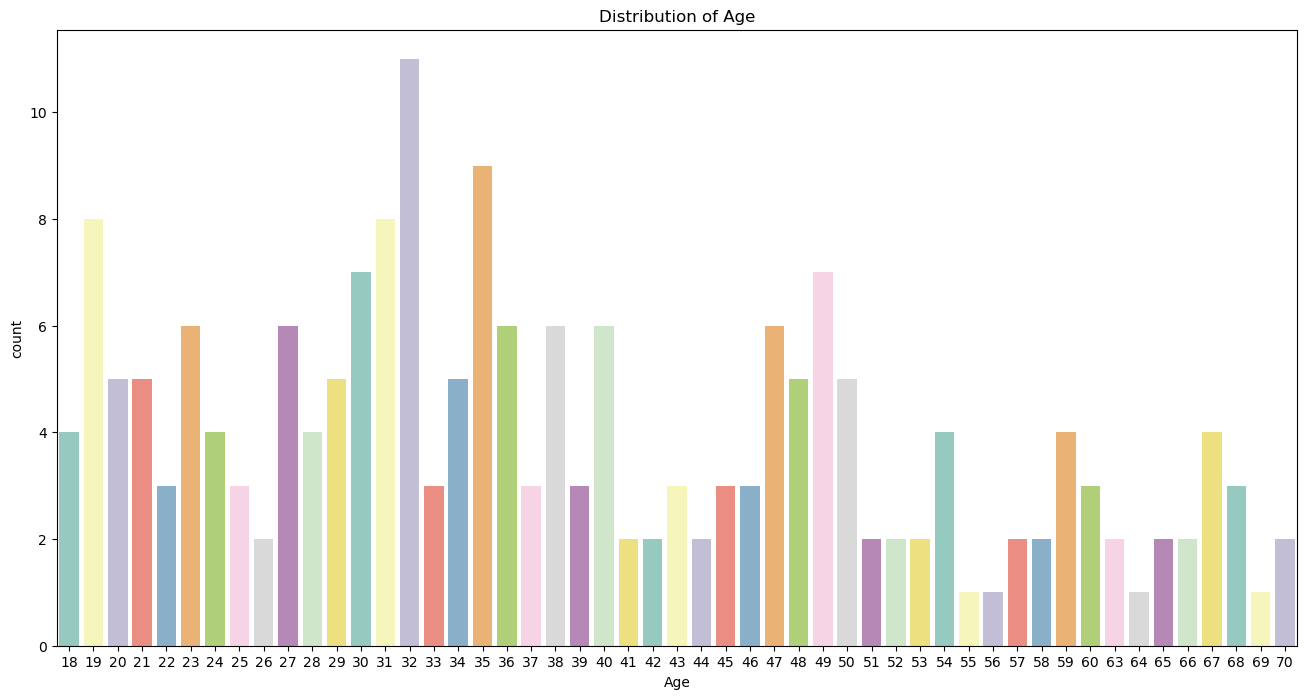

In [29]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Age', data=data, hue='Age', palette="Set3", legend=False)
plt.title("Distribution of Age")
plt.show()

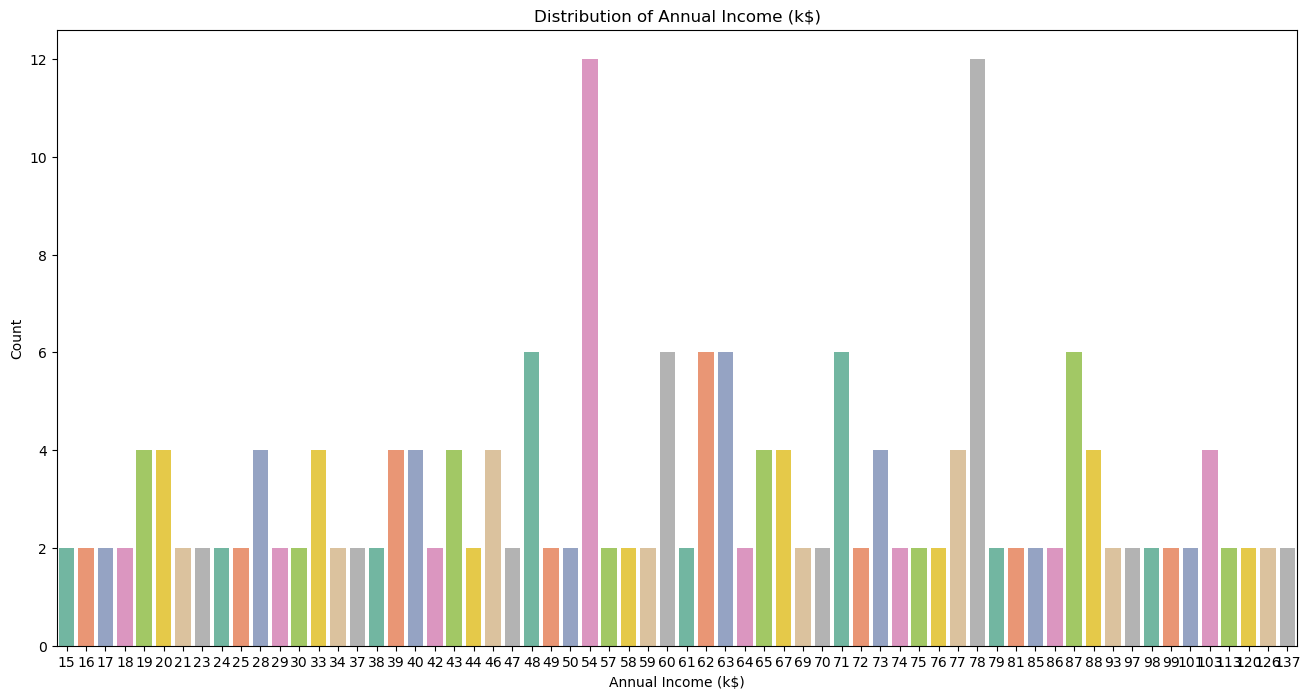

In [32]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Annual Income (k$)', data=data, hue='Annual Income (k$)', palette="Set2", legend=False)
plt.title("Distribution of Annual Income (k$)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

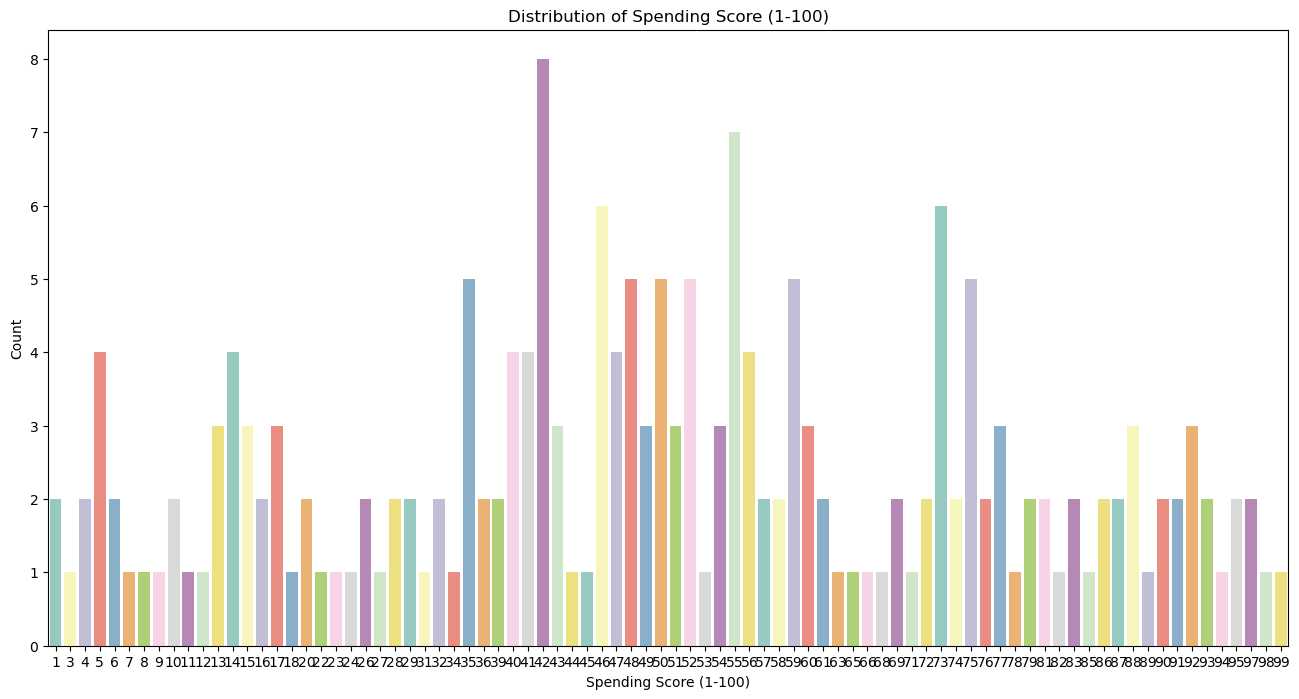

In [40]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Spending Score (1-100)', data=data, hue='Spending Score (1-100)', palette="Set3", legend=False)
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()

In [41]:
import dabl

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.13E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

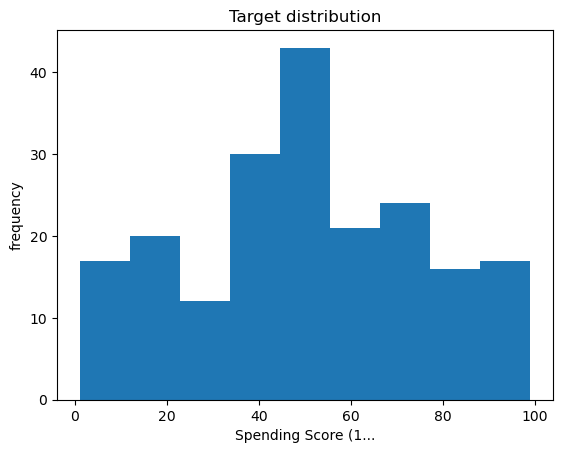

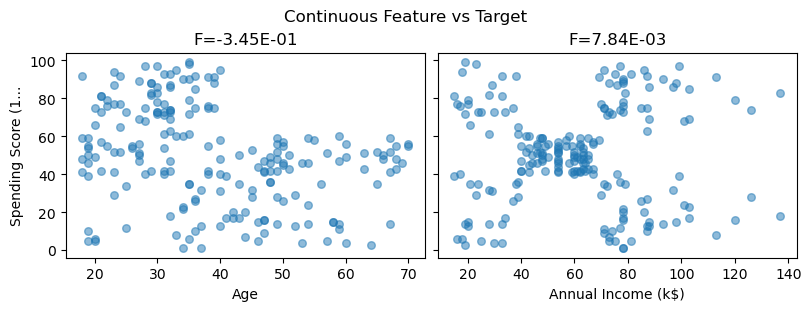

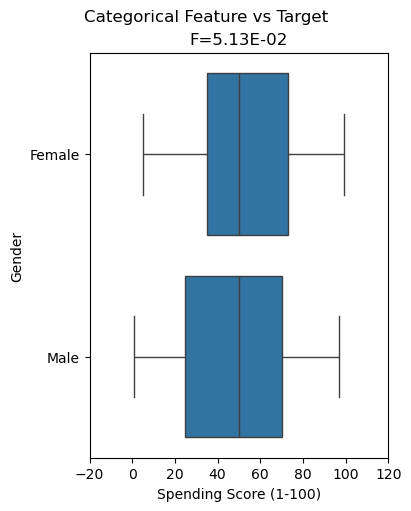

In [44]:
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

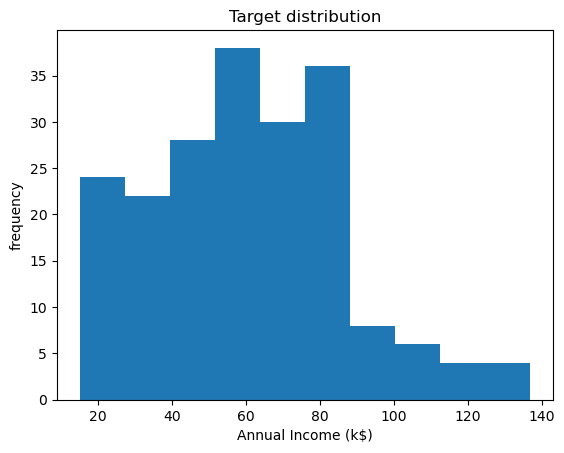

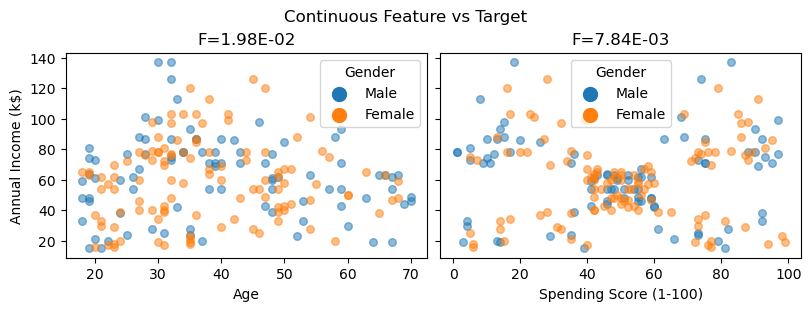

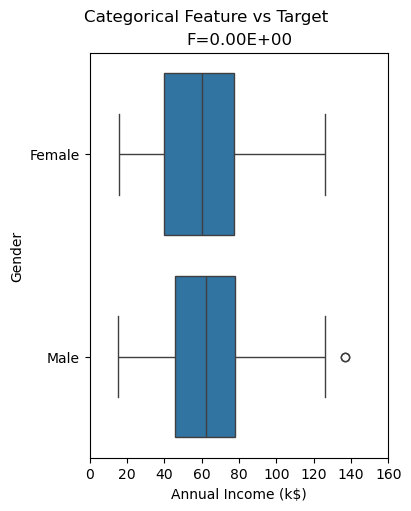

In [45]:
dabl.plot(data, target_col = 'Annual Income (k$)')

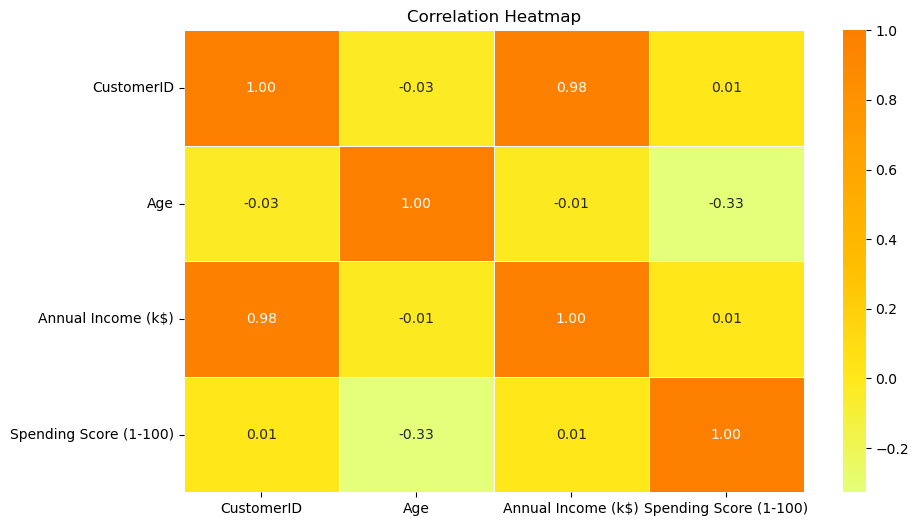

In [47]:
plt.figure(figsize=(10, 6))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), cmap='Wistia', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [48]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

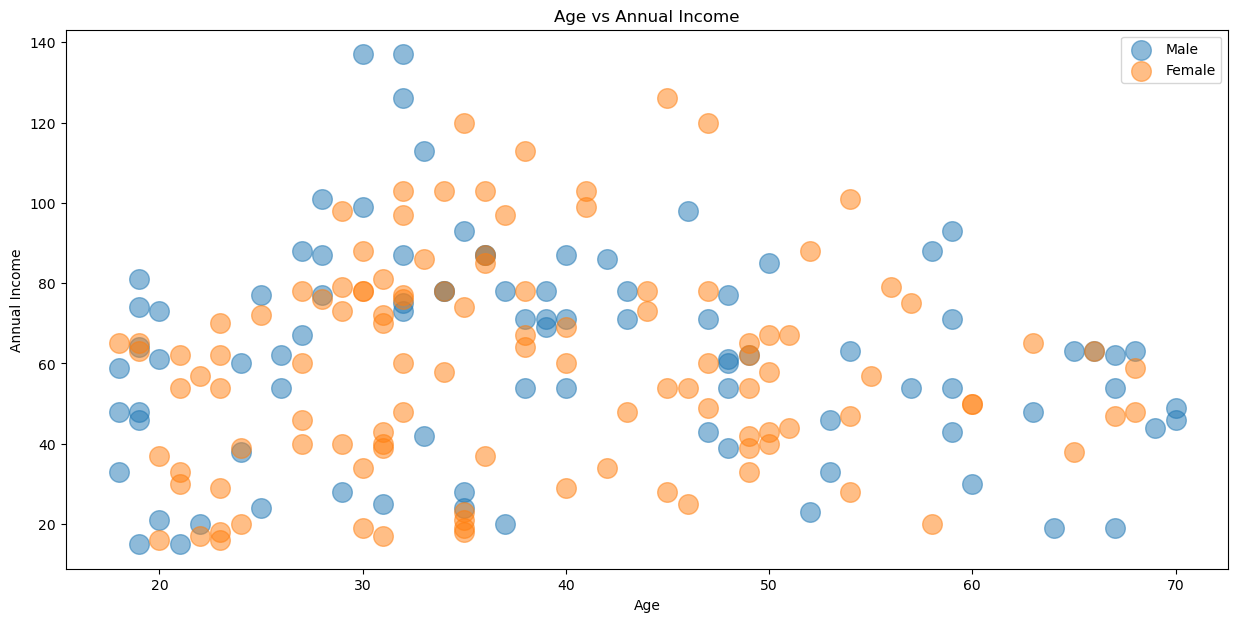

In [49]:
plt.figure(figsize = (15, 7))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', 
               data = data[data['Gender'] == gender],
               s = 200, alpha = 0.5,
               label = gender)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Annual Income")
plt.legend()
plt.show()

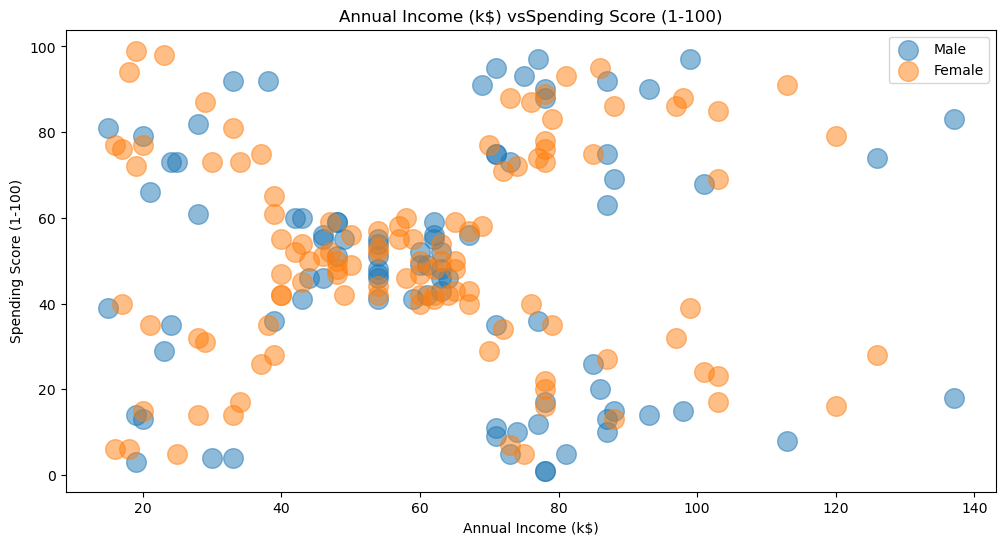

In [91]:
plt.figure(1 , figsize = (12 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income (k$) vsSpending Score (1-100)')
plt.legend()
plt.show()

In [51]:
#K-Means Clustering

In [52]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
x = data.iloc[:, [3,4]].values

In [19]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [21]:
from sklearn.cluster import KMeans

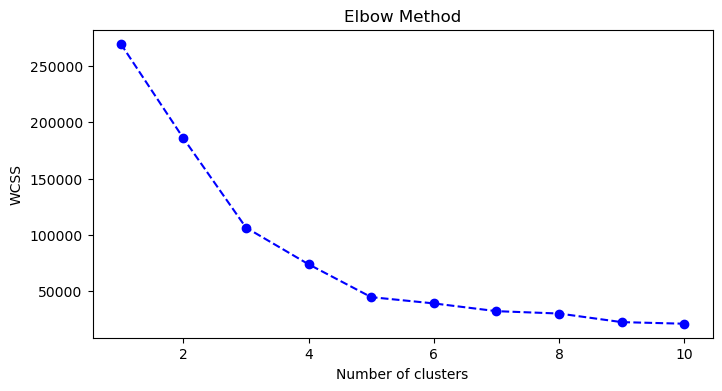

In [22]:
k = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    k.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), k, marker='o', linestyle='--', color='b')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

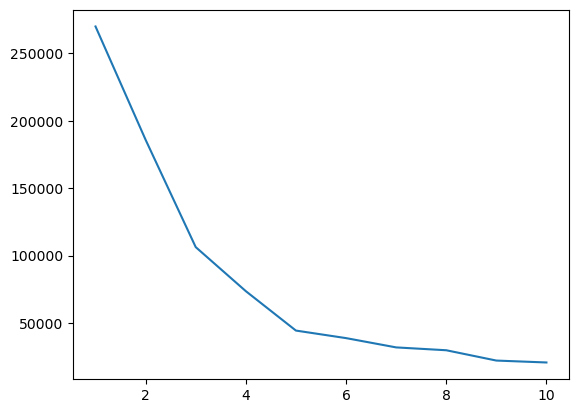

In [23]:
plt.plot(range(1, 11), k)
plt.show()

In [24]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [25]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = model.fit_predict(x)

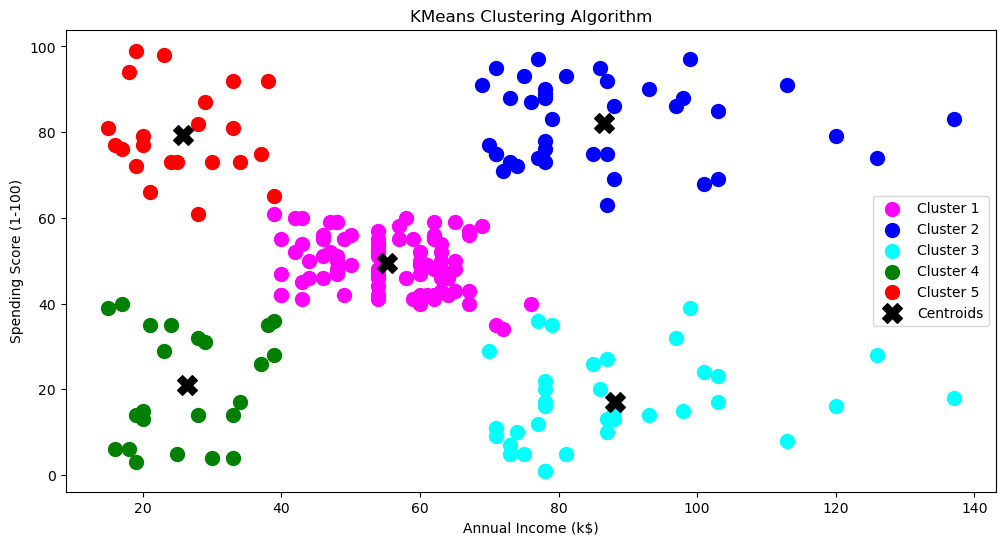

In [26]:
plt.figure(figsize=(12, 6))

# Plot each cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='magenta', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='green', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='red', label='Cluster 5')

# Plot centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            s=200, c='black', label='Centroids', marker='X')

plt.title('KMeans Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
#Clustering - Univariate, Bivariate, Multivariate

In [29]:
clustering1 = KMeans(n_clusters=3)

In [31]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [32]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
data['Income Cluster'] = clustering1.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [35]:
data['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [36]:
clustering1.inertia_

25640.457784396836

In [37]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [38]:
intertia_scores

[137277.28,
 48660.88888888889,
 25640.457784396836,
 13278.112713472485,
 9100.830157289776,
 7509.463001443002,
 4243.302724449464,
 2822.4996947496948,
 2469.935064935065,
 2013.4640637140642]

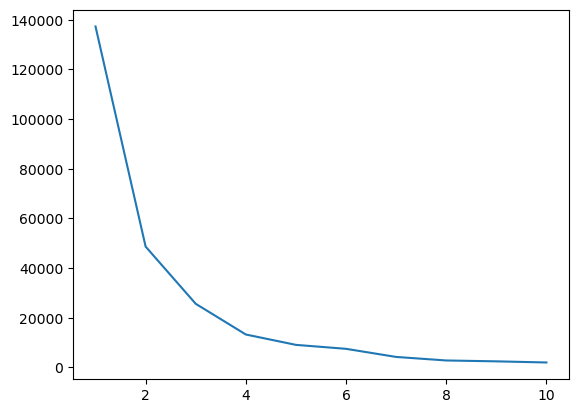

In [42]:
plt.plot(range(1,11),intertia_scores)
plt.show()

In [41]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [44]:
data.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [45]:
#Bivariate Clustering

In [46]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending and Income Cluster'] =clustering2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,4


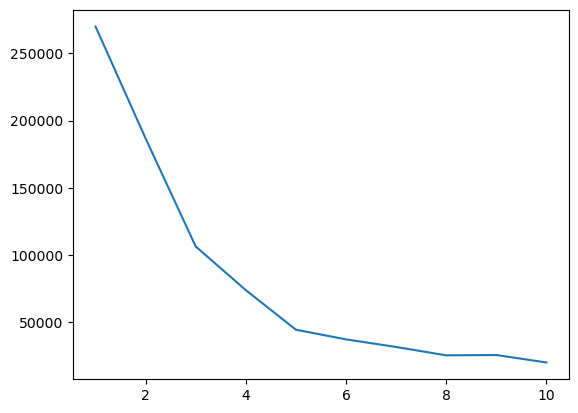

In [48]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)
plt.show()

In [49]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

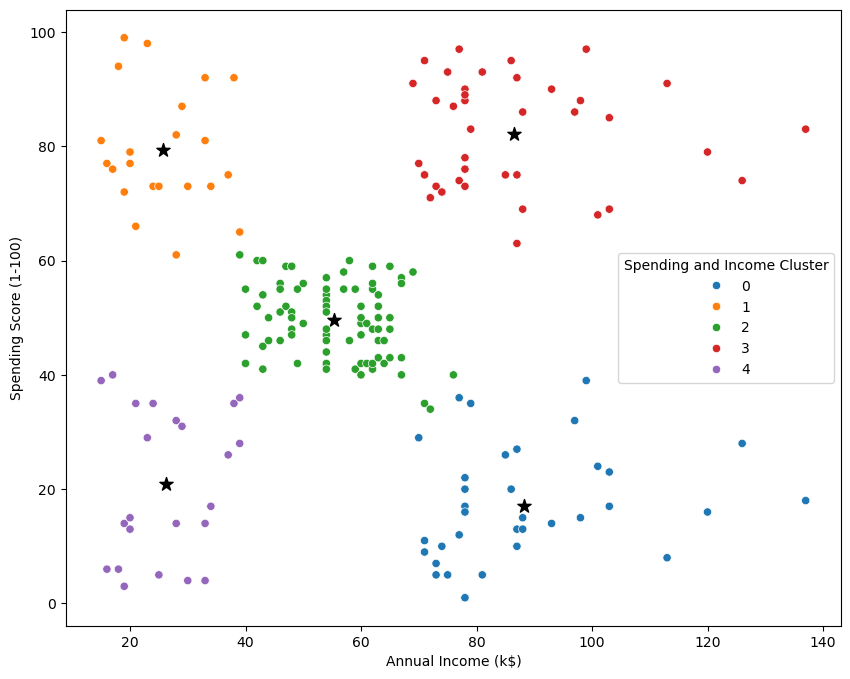

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [51]:
pd.crosstab(data['Spending and Income Cluster'],data['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.592593,0.407407
3,0.538462,0.461538
4,0.608696,0.391304


In [54]:
data.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [55]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [56]:
scale = StandardScaler()

In [57]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,4


In [58]:
dff = pd.get_dummies(data,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,4,True
1,2,21,15,81,2,1,True
2,3,20,16,6,2,4,False
3,4,23,16,77,2,1,False
4,5,31,17,40,2,4,False


In [60]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [61]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [62]:
dff = scale.fit_transform(dff)

In [63]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


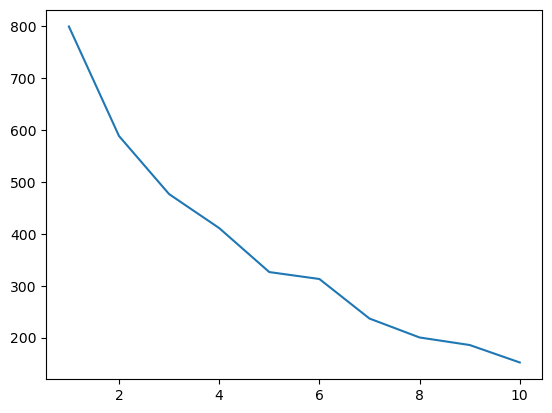

In [65]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)
plt.show()

In [67]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,1,3
198,199,Male,32,137,18,1,0
